<a href="https://colab.research.google.com/github/bhargavnarasimha14/Bhargav-sai/blob/main/Anuamala_Bhargav_Sai_Narasimha_In_class_Exerice_04_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(0, '0.016*"character" + 0.010*"year" + 0.009*"best" + 0.009*"world" + 0.009*"little" + 0.009*"people" + 0.008*"scene" + 0.007*"come" + 0.007*"life" + 0.007*"time"')
(1, '0.018*"time" + 0.016*"like" + 0.015*"story" + 0.009*"show" + 0.009*"good" + 0.008*"life" + 0.008*"make" + 0.008*"well" + 0.007*"love" + 0.007*"even"')
(2, '0.011*"like" + 0.011*"first" + 0.009*"think" + 0.009*"character" + 0.009*"story" + 0.008*"message" + 0.008*"life" + 0.008*"make" + 0.007*"great" + 0.007*"even"')
(3, '0.012*"make" + 0.010*"time" + 0.010*"like" + 0.009*"story" + 0.008*"well" + 0.007*"little" + 0.007*"take" + 0.007*"life" + 0.007*"come" + 0.007*"scene"')
(4, '0.020*"show" + 0.010*"time" + 0.008*"many" + 0.008*"like" + 0.008*"episode" + 0.008*"well" + 0.007*"back" + 0.007*"know" + 0.007*"character" + 0.007*"scene"')
(5, '0.023*"game" + 0.018*"like" + 0.017*"would" + 0.011*"good" + 0.011*"character" + 0.011*"really" + 0.010*"people" + 0.009*"drug" + 0.009*"even" + 0.009*"many"')
(6, '0.029*"would" + 0.

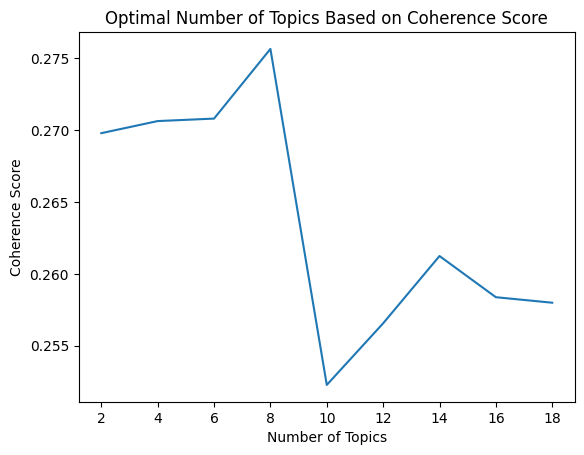

Optimal number of topics- 8


In [ ]:
# Install required libraries
!pip install pandas nltk gensim matplotlib pyLDAvis wordcloud

# Import libs
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess
import pyLDAvis
import pyLDAvis.gensim
import json
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Preparing the stop words
stop_words = stopwords.words('english')

# Load the IMDB dataset
df = pd.read_csv("IMDB Dataset.csv")
# Extracting the review content from the dataset
documents = df['review'].tolist()

# Cleaning
def clean_text(text):
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r"'", "", text)  # Remove apostrophes
    return text

# Clean the documents
documents = [clean_text(doc) for doc in documents]

# Tokenizing words
def tokenize(text):
    return [word for word in simple_preprocess(text) if word not in stop_words and len(word) > 3]

# Tokenize the documents
tokenized_docs = [tokenize(doc) for doc in documents]

# Bigram and trigram
bigram = Phrases(tokenized_docs, min_count=5, threshold=100)
trigram = Phrases(bigram[tokenized_docs], threshold=100)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Apply bigrams
data_bigrams = make_bigrams(tokenized_docs)

# NLTK WordNet Lemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_texts(texts):
    return [[lemmatizer.lemmatize(word) for word in doc] for doc in texts]

# Apply lemmatization
data_lemmatized = lemmatize_texts(data_bigrams)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(data_lemmatized)

# Filter extremes
dictionary.filter_extremes(no_below=15, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in data_lemmatized]

# LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

perplexity = lda_model.log_perplexity(corpus)
print(f'model perplexity: {perplexity}')

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'model coherence Score is {coherence_lda}')

# Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

# Function to compute coherence values for different topic counts
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Compute coherence values for different numbers of topics
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=2)

# Plot coherence scores
x = range(2, 20, 2)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics Based on Coherence Score")
plt.show()

# Selecting model with high coherence
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
optimal_lda_model = model_list[coherence_values.index(max(coherence_values))]

print(f"Optimal number of topics- {optimal_num_topics}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total Number of Documents: 999


/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(
/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in

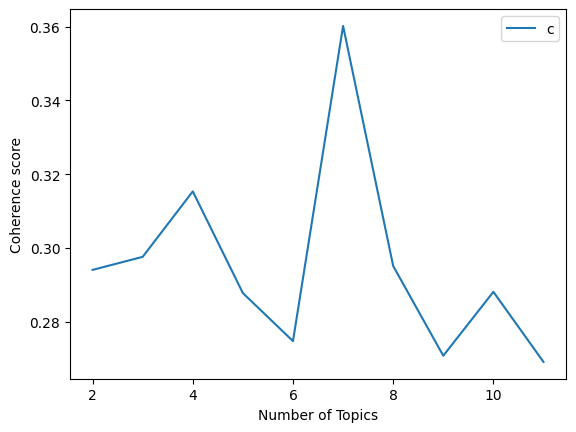

/usr/local/lib/python3.10/dist-packages/gensim/models/lsimodel.py:963: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(


[(0, '0.757*"br" + 0.271*"film" + 0.262*"movi" + 0.141*"one" + 0.123*"like" + 0.088*"make" + 0.086*"see" + 0.084*"charact" + 0.083*"get" + 0.079*"time"'), (1, '-0.596*"br" + 0.584*"movi" + 0.296*"film" + 0.147*"like" + 0.112*"see" + 0.109*"one" + 0.084*"watch" + 0.078*"would" + 0.078*"good" + 0.076*"get"'), (2, '0.735*"film" + -0.592*"movi" + -0.151*"br" + 0.055*"well" + 0.048*"play" + 0.046*"use" + 0.045*"one" + 0.042*"work" + 0.038*"charact" + 0.037*"seem"'), (3, '0.441*"film" + 0.342*"movi" + -0.324*"one" + -0.175*"like" + 0.167*"br" + -0.163*"world" + -0.145*"get" + -0.141*"new" + -0.130*"show" + -0.127*"charact"'), (4, '0.512*"world" + 0.383*"new" + -0.291*"one" + 0.229*"peopl" + 0.140*"seem" + 0.120*"drug" + -0.115*"scene" + -0.107*"get" + 0.098*"life" + 0.096*"dark"'), (5, '-0.409*"one" + 0.326*"like" + 0.204*"drug" + -0.193*"charact" + 0.147*"realli" + -0.145*"movi" + -0.137*"stori" + 0.130*"even" + -0.125*"world" + 0.115*"show"'), (6, '0.486*"show" + 0.297*"watch" + -0.262*"dr

In [ ]:
import pandas as pd
import json
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk

# Download the stopwords
nltk.download('stopwords')

# Load the dataset from CSV
df = pd.read_csv("IMDB Dataset.csv")
# extracting the req content from the dataset
documents_list = df['review'].tolist()
print("Total Number of Documents:", len(documents_list))

# preprocessing
def preprocess_data(doc_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in doc_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens) #appending tokens
    return texts

# preparing corpus
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

#gensim
def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

# lsa model coherence
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Plotting coherence scores
def plot_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

clean_text = preprocess_data(documents_list)
start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)

number_of_topics = 7
words = 10
model = create_gensim_lsa_model(clean_text, number_of_topics, words)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
 !pip install bertopic
import json
import pandas as pd
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# list to hold data
docs = []

# Load the dataset from CSV
df = pd.read_csv("IMDB Dataset.csv")
# extracting the req content from the dataset
docs = df['review'].tolist()

# BERT
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")
topics, probabilities = topic_model.fit_transform(docs)
topic_model.visualize_topics()
topic_model.visualize_barchart()

n_topics = len(set(topics))
print(f"total number of topics created {n_topics}")
# print summary
print("topic summary-")
for i in range(n_topics):
    topic_info = topic_model.get_topic(i)
    if topic_info:
        topic_words = [word for word, weight in topic_info]
        print(f"Topic {i}: {', '.join(topic_words)}")
    else:
        print(f"Topic {i}: No words found.")

# Creating a DataFrame for visualization
df = pd.DataFrame({'topic': topics, 'document': docs})
print(f"Documents for topic 0:\n{df.loc[df['topic'] == 0]['document'].tolist()}")

# Visualizing topic hierarchy
hierarchical_topics = topic_model.hierarchical_topics(docs, topics)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)
texts = [doc.split() for doc in docs]  # Tokenize documents

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

topics_list = []
for i in range(n_topics):
    topic_info = topic_model.get_topic(i)
    if topic_info:
        topic_words = [word for word, _ in topic_info]
        topics_list.append(topic_words)

# gensim Coherencemodel
coherence_model = CoherenceModel(topics=topics_list, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score is {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

total number of topics created 14
topic summary-
Topic 0: the, of, and, to, br, it, is, this, in, that
Topic 1: the, of, and, in, to, is, br, as, his, it
Topic 2: show, the, and, of, to, it, that, br, this, is
Topic 3: and, the, to, in, of, br, is, her, with, it
Topic 4: the, to, and, her, of, br, she, is, in, with
Topic 5: the, was, of, and, br, this, movie, it, is, to
Topic 6: the, of, and, is, it, in, to, br, as, that
Topic 7: the, this, of, to, br, and, movie, was, in, for
Topic 8: the, is, it, you, funny, this, to, br, that, and
Topic 9: the, and, this, it, to, movie, is, of, my, was
Topic 10: the, movie, is, of, in, and, it, to, this, not
Topic 11: the, and, to, his, of, in, br, is, he, that
Topic 12: the, not, that, of, movie, it, was, because, and, rotj
Topic 13: No words found.
Documents for topic 0:
["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap o

100%|██████████| 12/12 [00:00<00:00, 90.08it/s]


Coherence Score is 0.3704748502902764


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


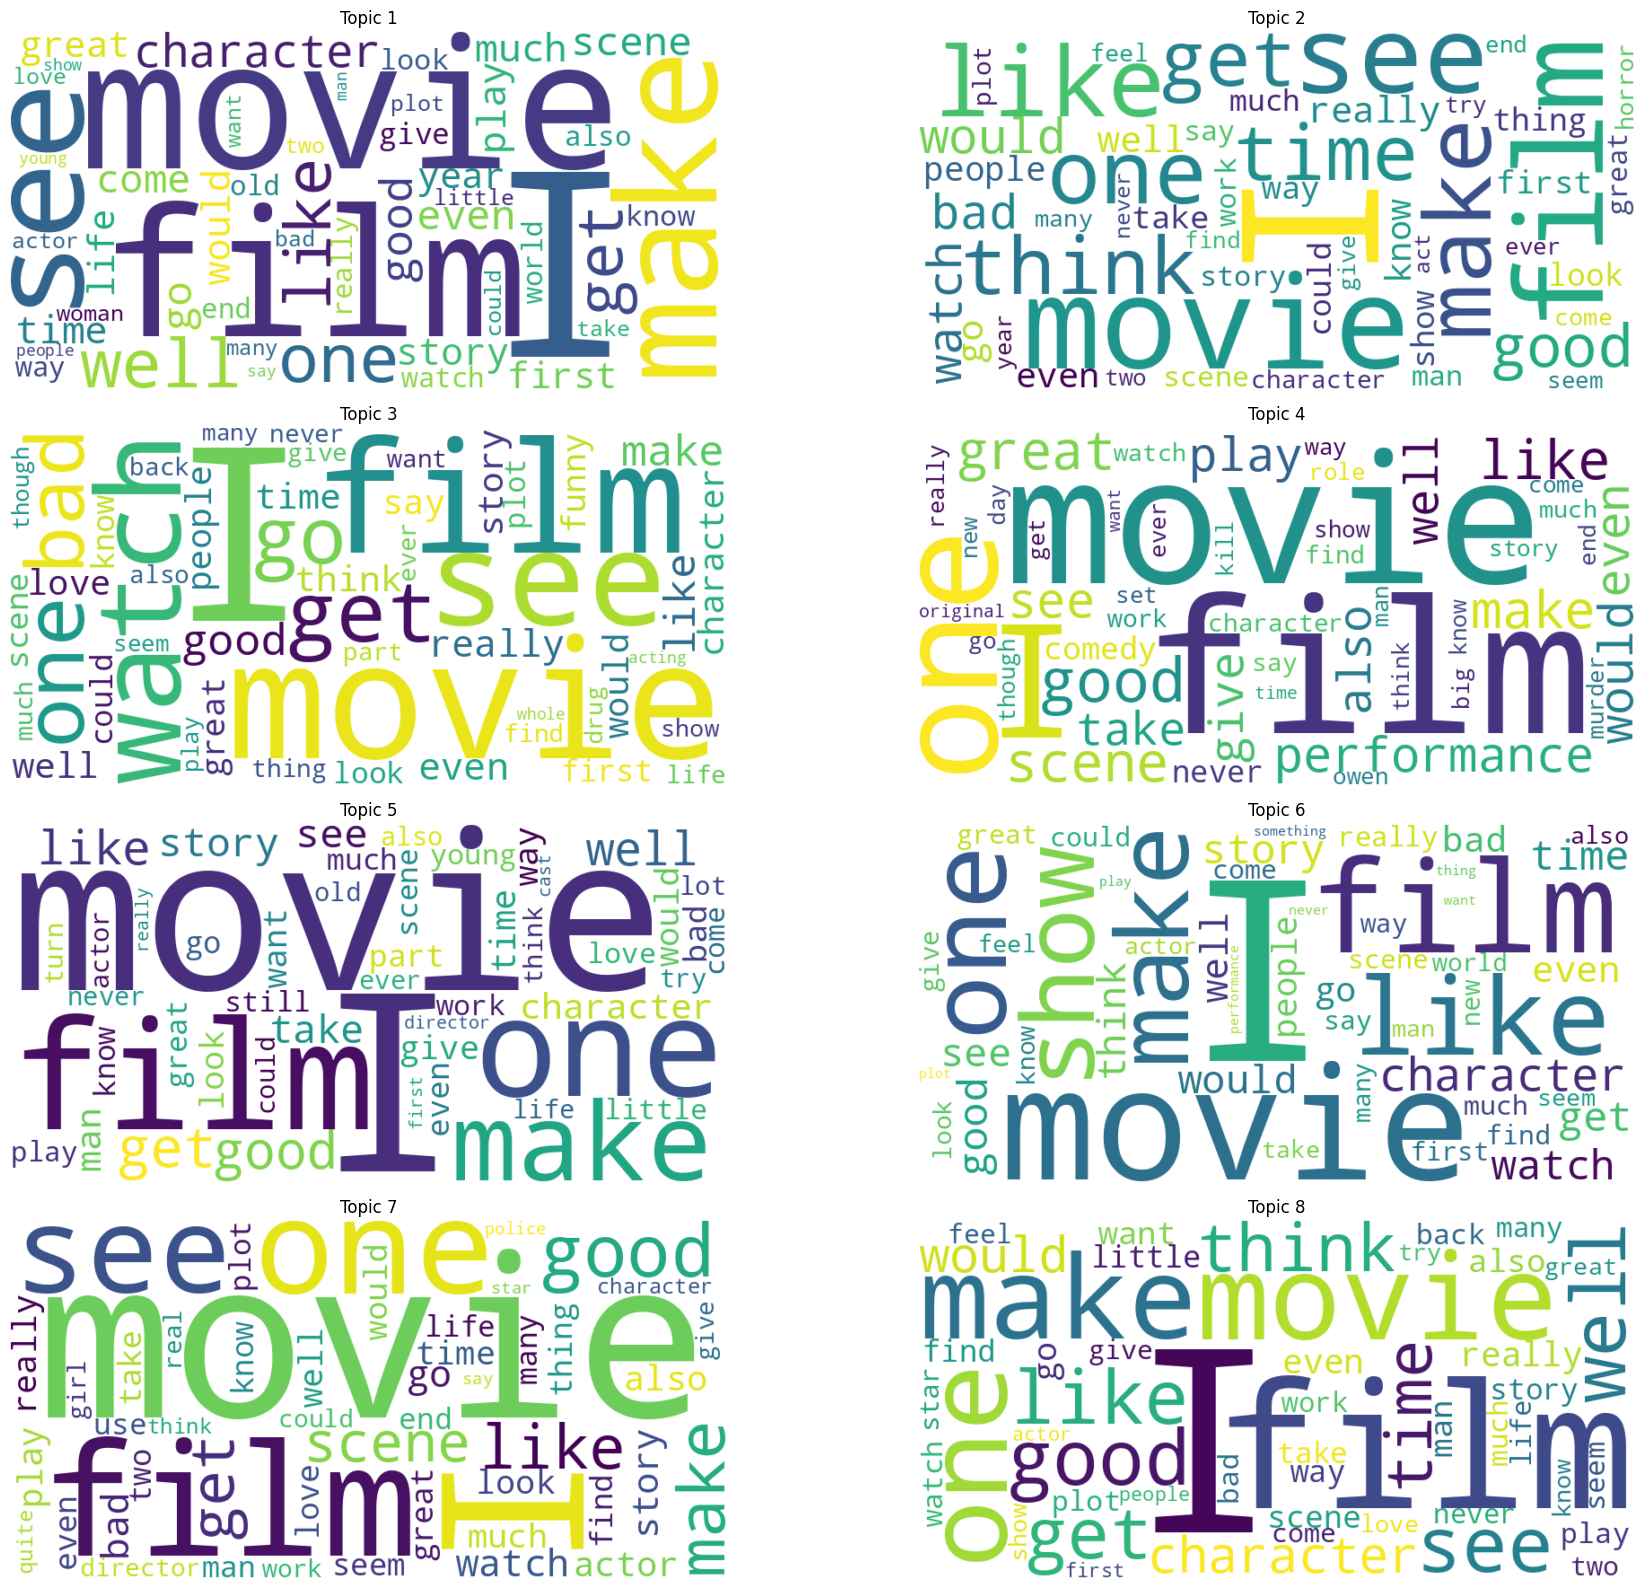

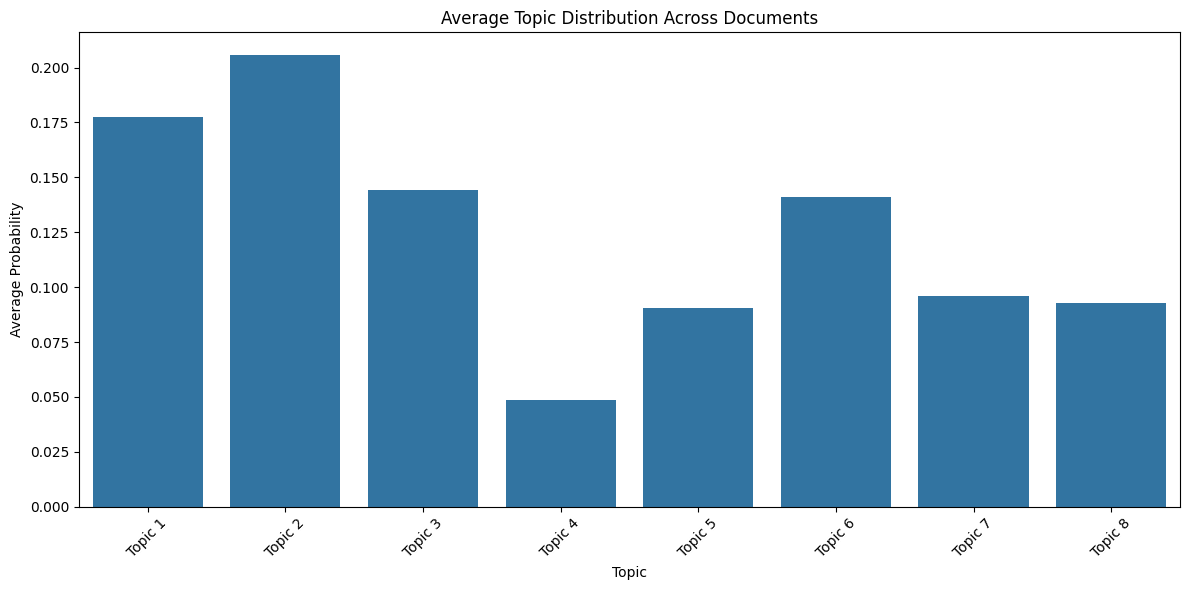

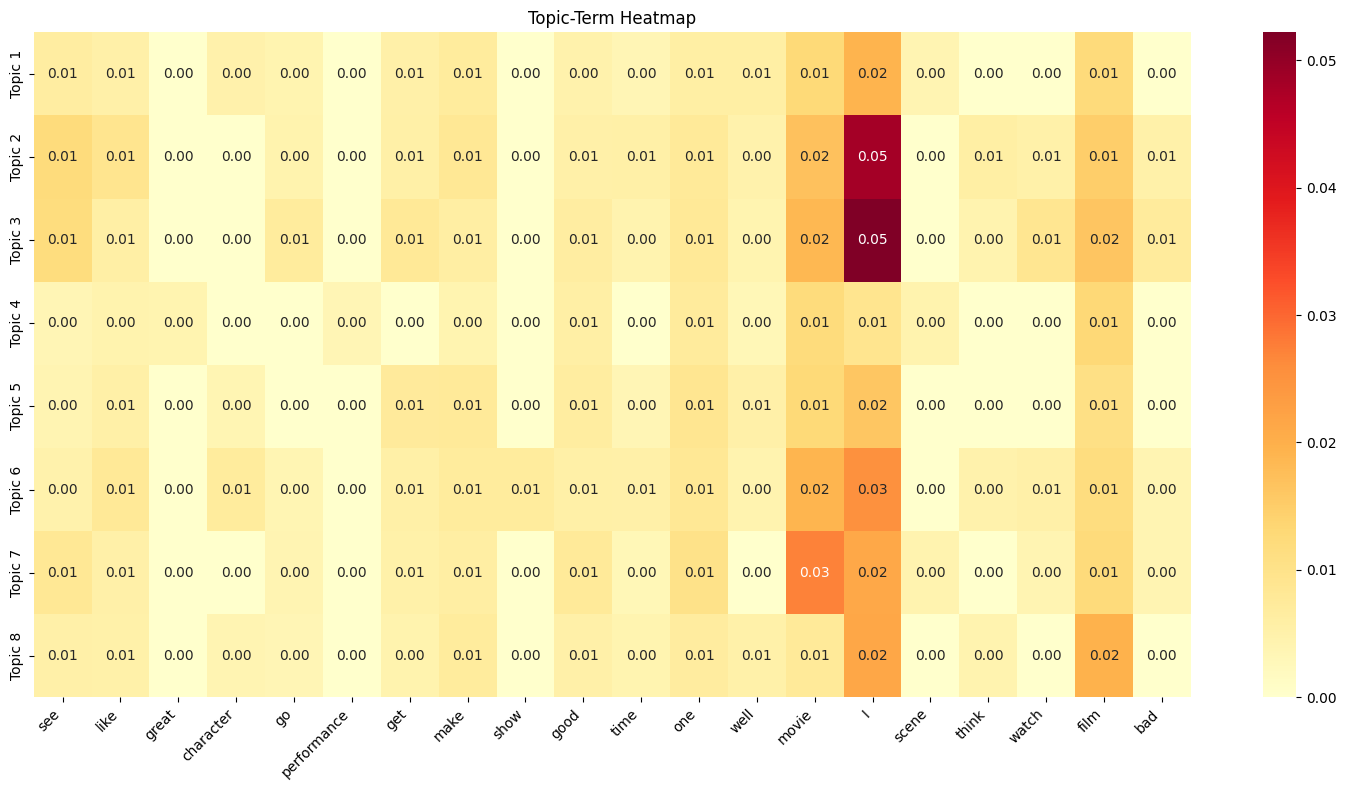

In [ ]:
import pandas as pd
import spacy
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import numpy as np

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Custom stop words
custom_stopwords = set(stopwords.words('english')).union(set([
    'the', 'of', 'and', 'to', 'br', 'it', 'is', 'this', 'in', 'that'
]))

def load_and_preprocess_data(file_path):
    # Load data from CSV
    df = pd.read_csv("IMDB Dataset.csv")
    docs = df['review'].tolist()
    def preprocess(text):
        # Converting to lowercase and lemmatizing
        doc = nlp(text.lower())
        return [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in custom_stopwords]

    processed_docs = [preprocess(doc) for doc in docs]

    return processed_docs

def create_lda_model(processed_docs, num_topics=10):
    id2word = corpora.Dictionary(processed_docs)
    corpus = [id2word.doc2bow(text) for text in processed_docs]
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        alpha='auto',
        per_word_topics=True
    )

    return lda_model, corpus, id2word

def plot_topic_wordcloud(lda_model, num_topics):
    plt.figure(figsize=(20, 4 * ((num_topics + 1) // 2)))

    for i in range(num_topics):
        plt.subplot((num_topics + 1) // 2, 2, i + 1)
        word_probs = dict(lda_model.show_topic(i, topn=50))
        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            prefer_horizontal=0.7
        ).generate_from_frequencies(word_probs)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {i + 1}')

    plt.tight_layout()
    return plt

def plot_topic_distribution(lda_model, corpus, num_topics):
    # Topic distribution
    doc_topics = [dict(lda_model.get_document_topics(doc)) for doc in corpus]
    topic_matrix = np.zeros((len(corpus), num_topics))
    for i, doc_topic in enumerate(doc_topics):
        for topic_id, prob in doc_topic.items():
            topic_matrix[i, topic_id] = prob

    avg_topic_probs = topic_matrix.mean(axis=0)

    topic_df = pd.DataFrame({
        'Topic': [f'Topic {i + 1}' for i in range(num_topics)],
        'Average Probability': avg_topic_probs
    })

    # Bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Topic', y='Average Probability', data=topic_df)
    plt.title('Average Topic Distribution Across Documents')
    plt.xticks(rotation=45)
    plt.tight_layout()
    return plt

def plot_topic_heatmap(lda_model, id2word, num_topics):
    top_terms = []
    term_scores = []

    for topic_id in range(num_topics):
        top_terms_topic = [term for term, _ in lda_model.show_topic(topic_id, topn=10)]
        top_terms.extend(top_terms_topic)

    unique_terms = list(set(top_terms))
    term_topic_matrix = np.zeros((num_topics, len(unique_terms)))

    for topic_id in range(num_topics):
        term_probs = dict(lda_model.show_topic(topic_id, topn=len(unique_terms)))
        for i, term in enumerate(unique_terms):
            term_topic_matrix[topic_id, i] = term_probs.get(term, 0)

    # Heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(
        term_topic_matrix,
        xticklabels=unique_terms,
        yticklabels=[f'Topic {i + 1}' for i in range(num_topics)],
        cmap='YlOrRd',
        annot=True,
        fmt='.2f'
    )
    plt.title('Topic-Term Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt

def main():
    processed_docs = load_and_preprocess_data("IMDB Reviews.csv")
    # LDA model
    num_topics = 8
    lda_model, corpus, id2word = create_lda_model(processed_docs, num_topics)


    wordcloud_plot = plot_topic_wordcloud(lda_model, num_topics)
    wordcloud_plot.savefig('topic_wordclouds.png')


    dist_plot = plot_topic_distribution(lda_model, corpus, num_topics)
    dist_plot.savefig('topic_distribution.png')


    heatmap_plot = plot_topic_heatmap(lda_model, id2word, num_topics)
    heatmap_plot.savefig('topic_heatmap.png')
    vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    pyLDAvis.save_html(vis_data, 'lda_visualization.html')

if __name__ == "__main__":
    main()



Visualization1: Word Clouds display most significant terms in each topic and while implemeting this common stop words will be removed by performing word clouds we can identify ehich topics are unique


Visualization2: Topic distribution bar plot visualizes average probabilty of topics in documents, we can compare height of bar to compare the topics and it gives insights about the content

Visualization3: Heatmap shows relations between topics and significant terms associated with topics which can be identified with color intensity and we can identify key termd and cross topic analysis

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
LDA-     coherence scores of lda are moderate(in large datasets) and it has higher interpretability and consitency
         of lda can vary from topic to topic but it does not perform well in small datasets.
LSA-     LSA coherence score is lower than LDA and LSA is not showing consistent results as no of topics increaces
         and LSA works better on small datasets
BERT-    BERTopic gives higher coherence scores in large and complex datasets and it is highly interpretable and
         higher consistency but it requires more computational time
Ida2Vec- Ida2Vec coherence score generally matches LDA or LSA and it offers good interpretabilityand it will not
         perform like BERT.
Bert is generally better among the four and Ida2Vec is a second alternative, Bert is best because of embedding
based approach and coherence, if there is no computational limitation bert is always best choice.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
I gained hands on experience in topic modelling and i understoop differences between lda,lsa and bert, challanges
i faced are in managing the dependencies and it is time consuming in colab and this is highly relevant to my
field of study




'''